# Project 6 - Effect of Weather on Travel Frequency

## Project Description

Zuber, a new ride-sharing company launched in Chicago. In this analysis, you will find patterns in the available information and understand passenger preferences and the impact of external factors on travel.
Using a database, we will analyze data from competitors and test hypotheses regarding the influence of weather on travel frequency.

### Steps of The Project
1. Initialization
2. Data Overview
3. Explorative Data Analysis
4. Hypothesis Testing
5. General Conclusion

### Data Description

Database containing information on taxi rides in Chicago:

Neighborhood table: data regarding areas in the city of Chicago
- `name`: region name
- `neighborhood_id`: area code
- `Cabs` table: taxi related data
- `cab_id`: vehicle code
- `vehicle_id`: vehicle technical ID
- `company_name`: name of the company that owns the vehicle

Trips table: travel related data
- `trip_id`: trip code
- `cab_id`: operating vehicle code
- `start_ts`: date and time the trip started (time rounded in hours)
- `end_ts`: date and time the trip ends (time rounded in hours)
- `duration_seconds`: trip duration in seconds
- `distance_miles`: trip distance in miles
- `pickup_location_id`: pickup area code
- `dropoff_location_id`: delivery area code

weather_records table: weather related data
- `record_id`: weather recording code
- `ts`: date and time when weather recording was carried out (time rounded in hours)
- `temperature`: the temperature when weather recording was carried out
- `description`: a short description of the weather conditions, such as "light rain" or "scattered clouds".

From the file above, the following file results are obtained:

(project_sql_result_01.csv.) This file contains the following data:
- `company_name`: taxi company name
- `trips_amount`: number of trips for each taxi company on 15-16 November 2017.

(project_sql_result_04.csv.) This file contains the following data:
- `dropoff_location_name`: name of the area in Chicago where the trip ends
- `average_trips`: average number of trips ending in each region in November 2017.

(project_sql_result_07.csv) — result of the last query.
This file contains travel data from the Loop to O'Hare International Airport. This file contains the following data:
- `start_ts` : pick-up date and time
- `weather_conditions` : weather conditions when the trip starts
- `duration_seconds` : trip duration in seconds

## Initialization

In [1]:
# import library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import warnings

warnings.filterwarnings('ignore')

### Import File

In [2]:
data1 = pd.read_csv('project_sql_result_01.csv')
data1

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


In [3]:
data4 = pd.read_csv('project_sql_result_04.csv')
data4

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


## Data Overview

In [4]:
data1.shape, data4.shape

((64, 2), (94, 2))

In [5]:
data1.info()
data1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [6]:
data4.info()
data4.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


**Missing Value**

In [7]:
data1.isnull().sum()

company_name    0
trips_amount    0
dtype: int64

In [8]:
data4.isnull().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

**Type of Data**

In [9]:
data1.dtypes

company_name    object
trips_amount     int64
dtype: object

In [10]:
data4.dtypes

dropoff_location_name     object
average_trips            float64
dtype: object

**Kesimpulan**

Data yang telah dilakukan penguraian serta pada sql tidak terdapat nilai yang null dan tipe data yang berbeda dari seharusnya. Untuk itu ada beberapa informasi lainnya seperti :
- Untuk file data yang digunakkan dalam analisa data eksploratif terdiri dari 2 file yang masing masing memiliki 2 kolom, serta baris yang berbeda, dimana data mengenai jumlah trip memiliki 64 baris dan data mengenai rata rata trip memiliki 94 baris
- Untuk tipe data pada kolom 'average_trips' pada tabel data7 akan dibiarkan berbentuk pecahan karena tidak menjadi masalah serius

## Explorative Data Analysis

### Identify the Top 10 Regions as Drop-off Points

In [11]:
data4_10_top_dropoff = data4.sort_values('average_trips', ascending=False).head(10)
data4_10_top_dropoff

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


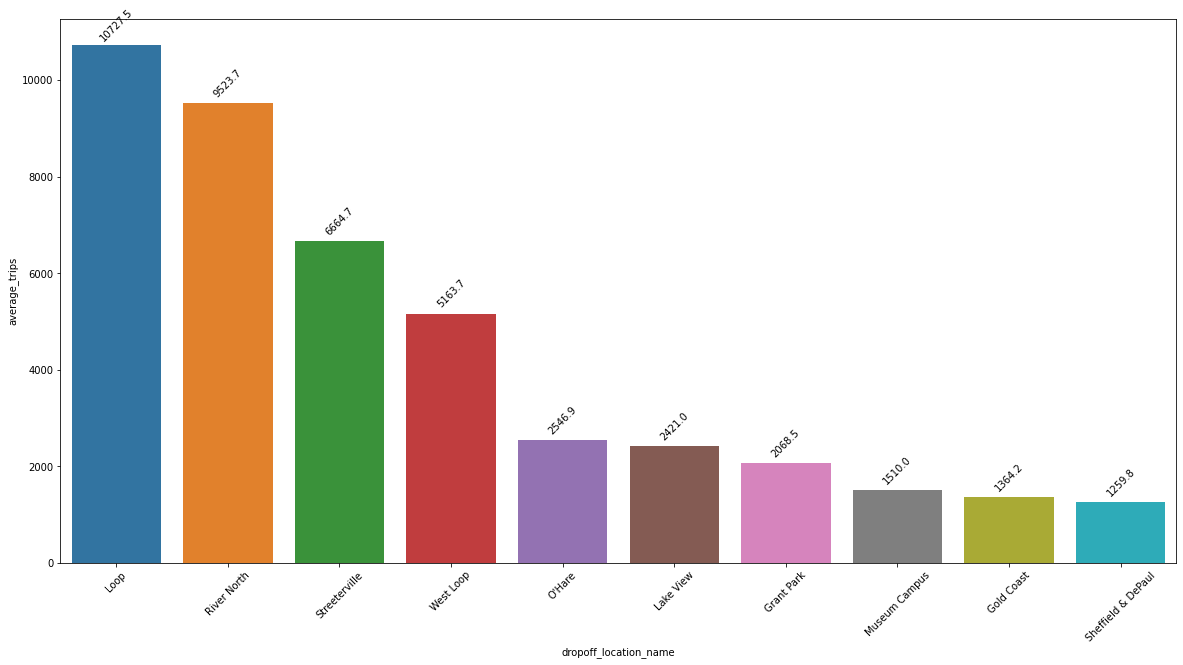

In [12]:
plt.figure(figsize=(25,10))
splot = sns.barplot(data=data4_10_top_dropoff, x='dropoff_location_name', y='average_trips')

for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 20), rotation=45,
                   textcoords = 'offset points')
    
plt.xticks(rotation = 45) 
plt.show()

**Findings :**

- The region with the highest average trip results is the Loop region with an average number of 10728 trips
- The O'Hare area which will later be used as parameters for hypothesis testing is at an average of 2421 trips

### Taxi Companies and Number of Trips, Top 10 Regions by Number of Deliveries

In [13]:
data1_10_top_company = data1.sort_values('trips_amount', ascending=False).head(10)
data1_10_top_company

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


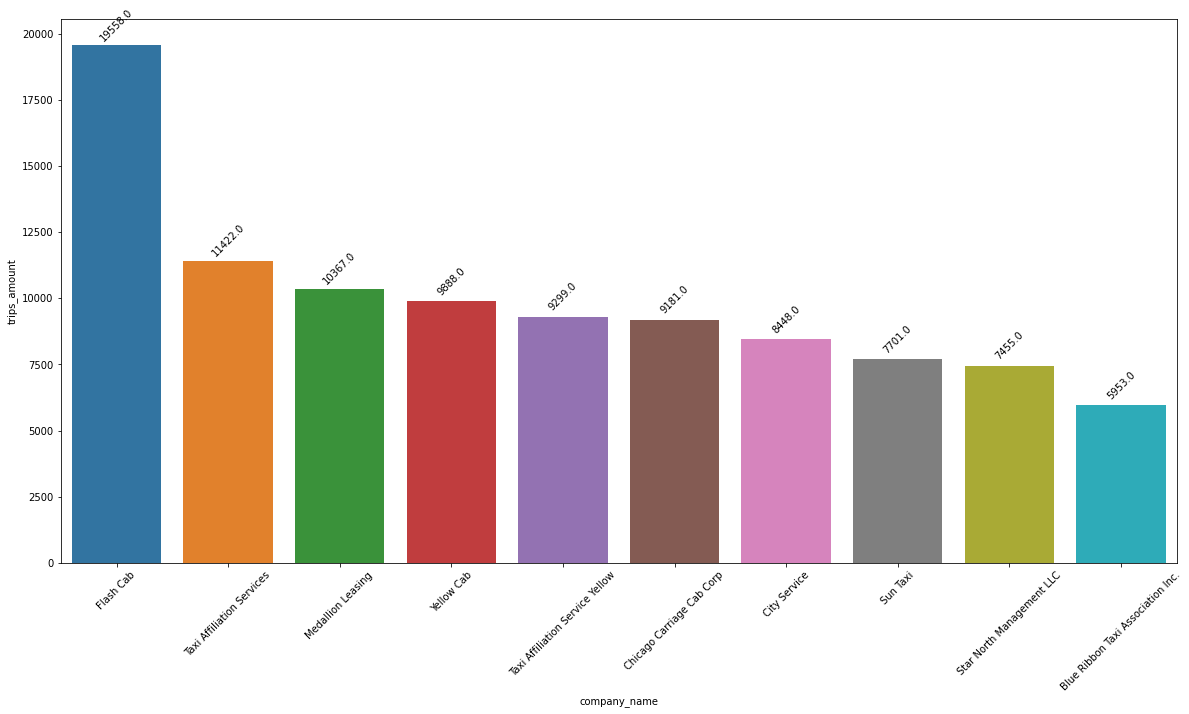

In [14]:
plt.figure(figsize=(25,10))
splot = sns.barplot(data=data1_10_top_company, x='company_name', y='trips_amount')

for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 20), rotation=45,
                   textcoords = 'offset points')
    
plt.xticks(rotation = 45) 
plt.show()

**Findings :**

- Flash Cab is the company with the highest number of total trips at 19,558, even quite different from the second place, namely Taxi Affiliate Service with 11,422 total trips.

### Checking for Outlier

In [15]:
data7 = pd.read_csv('project_sql_result_07.csv')
data7

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [16]:
data7.info()
data7.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


<AxesSubplot:xlabel='duration_seconds', ylabel='weather_conditions'>

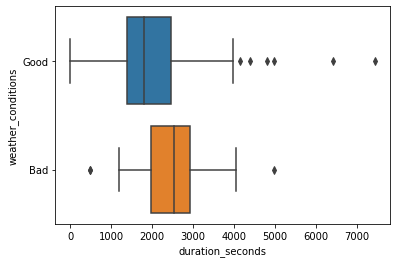

In [17]:
sns.boxplot(data=data7, x='duration_seconds', y='weather_conditions')

**Findings :**

Hypothesis testing requires data that is clean enough from outliers, therefore there are several notes in the following data file:
- The file contains 3 columns including time square, weather conditions, and weather duration
- There are no null values, so you only need to clean outliers
- Safe data type and can continue with outlier cleaning

In [18]:
Q1 = data7['duration_seconds'].quantile(0.25)
Q3 = data7['duration_seconds'].quantile(0.75)

IQR = Q3 - Q1

low_whis = Q1 - (1.5 * IQR)
up_whis = Q3 + (1.5 * IQR)

if low_whis < 0:
    low_whis = 0

print('Q1 :', Q1)
print('Q3 :', Q3)
print('IQR :', IQR)
print('min :', low_whis)
print('max :', up_whis)

Q1 : 1438.25
Q3 : 2580.0
IQR : 1141.75
min : 0
max : 4292.625


In [19]:
data7_no_outlier = data7[(data7['duration_seconds']>low_whis) & (data7['duration_seconds']<up_whis)]

<AxesSubplot:xlabel='duration_seconds', ylabel='weather_conditions'>

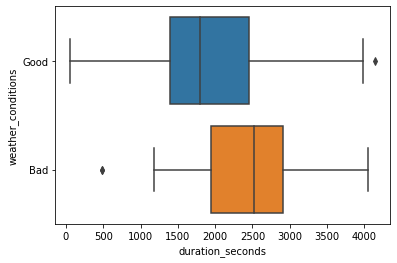

In [20]:
sns.boxplot(data=data7_no_outlier, x='duration_seconds', y='weather_conditions')

## Hypothesis Testing

- Ho : The average trip duration from the Loop to O'Hare International Airport is the SAME on rainy Saturdays
- H1 : The average trip duration from the Loop to O'Hare International Airport is NOT THE SAME on rainy Saturdays

In [21]:
pd.to_datetime(data7_no_outlier['start_ts']).dt.date.value_counts()

2017-11-11    421
2017-11-04    365
2017-11-18    178
2017-11-25     92
Name: start_ts, dtype: int64

In [22]:
data7_no_outlier.head(10)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


In [23]:
data7_no_outlier['weather_conditions'].value_counts()

Good    877
Bad     179
Name: weather_conditions, dtype: int64

In [24]:
good_weather = data7_no_outlier[data7_no_outlier['weather_conditions']=='Good'].reset_index()
bad_weather = data7_no_outlier[data7_no_outlier['weather_conditions']=='Bad'].reset_index()

In [25]:
good_weather.head(10)

,index,start_ts,weather_conditions,duration_seconds
0,0,2017-11-25 16:00:00,Good,2410.0
1,1,2017-11-25 14:00:00,Good,1920.0
2,2,2017-11-25 12:00:00,Good,1543.0
3,3,2017-11-04 10:00:00,Good,2512.0
4,4,2017-11-11 07:00:00,Good,1440.0
5,5,2017-11-11 04:00:00,Good,1320.0
6,7,2017-11-18 11:00:00,Good,2280.0
7,8,2017-11-11 14:00:00,Good,2460.0
8,9,2017-11-11 12:00:00,Good,2040.0
9,10,2017-11-18 06:00:00,Good,1500.0


In [26]:
bad_weather.head(10)

,index,start_ts,weather_conditions,duration_seconds
0,6,2017-11-04 16:00:00,Bad,2969.0
1,30,2017-11-18 12:00:00,Bad,1980.0
2,34,2017-11-04 17:00:00,Bad,2460.0
3,51,2017-11-04 16:00:00,Bad,2760.0
4,52,2017-11-18 12:00:00,Bad,2460.0
5,54,2017-11-18 10:00:00,Bad,1440.0
6,65,2017-11-04 18:00:00,Bad,2363.0
7,70,2017-11-18 16:00:00,Bad,3000.0
8,78,2017-11-04 16:00:00,Bad,3120.0
9,92,2017-11-18 07:00:00,Bad,1511.0


In [27]:
good_weather.shape, bad_weather.shape

((877, 4), (179, 4))

In [28]:
np.var(good_weather['duration_seconds'])

473991.7496388771

In [29]:
np.var(bad_weather['duration_seconds'])

483684.220342686

In [30]:
alpha = 0.05

result_levene = st.levene(good_weather['duration_seconds'], bad_weather['duration_seconds']).pvalue
print(result_levene)

if result_levene<alpha:
    print('Reject null hypothesis')
else:
    print('Accept null hypothesis')

0.7888178851804917
Accept null hypothesis


In [31]:
alpha = 0.05

result_ttest = st.ttest_ind(good_weather['duration_seconds'], bad_weather['duration_seconds'], equal_var=True).pvalue
print(result_ttest)

if result_ttest<alpha:
    print('Reject null hypothesis')
else:
    print('Accept null hypothesis')

2.3968233040077725e-13
Reject null hypothesis


## General Conclusion

- Information and intellectual information about web developers is needed for an analyst
- Skills in managing data in SQL are the key to this analysis
- A task elaboration system that can be developed in this project to minimize errors
- Parsing data from websites is very necessary for a data analyst
- Selection and merging of several files into 1 data file is very useful for analysis results
- There are no errors in the data types used in the analysis
- There are no null values which makes it easier for an analyst to process the data
- Outliers that must be considered when testing a hypothesis